<a href="https://colab.research.google.com/github/Desmyk/ADVMachineLearning/blob/main/WEEK2/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Clustering Project: Customer Personality Analysis***

**Author:** Michael Mbugua  
**Project Type:** Machine Learning Capstone  
**Dataset Source:** [Kaggle - Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

---

## ***Objective***
To help a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

For this project, I'll use Customer Personality Analysis (CPA) dataset from Kaggle. It's excellent for segmentation as it contains:

- Demographic information (age, education, marital status)

- Purchasing behavior (wine, fruits, meat products, etc.)

- Promotion sensitivity

- Purchase channels

In [9]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


## Data Loading and Initial Exploration

In [13]:
# Load the dataset
data = pd.read_csv('marketing_campaign.csv', sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
# check shape of dataset
data.shape

(2240, 29)

In [17]:
# show info on dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
# Check the summary statistics
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [20]:
# Check for missing values
data.isnull().sum()

# Income shows missing values

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## Data Preprocessing (EDA and Visualization)

In [22]:
# Handle missing values (in Income column)
data['Income'] = data['Income'].fillna(data['Income'].median())

# we've filled with the median values

In [23]:
# Feature engineering - create new relevant features

# Calculate customer age (from Year_Birth)
data['Age'] = 2025 - data['Year_Birth']

# Calculate total spending across categories
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_cols].sum(axis=1)

# Calculate family size
data['Family_Size'] = data['Kidhome'] + data['Teenhome']

# Calculate customer tenure (days since enrollment)
data['Tenure_Days'] = (pd.to_datetime('today') - pd.to_datetime(data['Dt_Customer'], dayfirst=True)).dt.days

# Select relevant features for clustering
cluster_features = [
    'Age',
    'Income',
    'Total_Spending',
    'Family_Size',
    'Recency',  # Days since last purchase
    'NumWebPurchases',
    'NumStorePurchases',
    'NumCatalogPurchases'
]

# Create new dataframe with selected features
cluster_df = data[cluster_features].copy()

# Standardize the data (important for distance-based algorithms like K-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

### 1. *Demographic Analysis*

### Age Distribution

In [32]:
import plotly.express as px

fig = px.histogram(data, x='Age', nbins=40, title='Interactive Age Distribution',
                   color_discrete_sequence=['indianred'])
fig.update_layout(bargap=0.1, xaxis_title='Age', yaxis_title='Count')
fig.show()

# - Most customers are between 40-60 years old.
# - Few young customers (<30) and very old (>80).

### Income Distribution

In [53]:
# Define bin edges and labels
income_bins = np.arange(0, data['Income'].max() + 10000, 10000)
income_labels = [f"{int(i/1000)}k-{int(j/1000)}k" for i, j in zip(income_bins[:-1], income_bins[1:])]

# Create binned income column
data['Income_Group'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

In [62]:
import plotly.express as px
import plotly.graph_objects as go

# Histogram
fig1 = px.histogram(data,
                    x='Income',
                    nbins=30,
                    title='1. Income Distribution of Customers',
                    color_discrete_sequence=['salmon'],
                    )

fig1.update_layout(
    bargap=0.05,
    xaxis_title='Income',
    yaxis_title='Count',
    title_font_size=18,
    plot_bgcolor='white'
)
fig1.show()

# Most incomes are between 20 -80k
# A few high-income outliers (>$100k)

In [67]:
# a detailed one(break down into lower values)

fig = px.bar(data['Income_Group'].value_counts().sort_index().reset_index(),
             x='Income_Group',
             y='count',
             labels={'Income_Group': 'Income Group', 'count': 'Number of Customers'},
             title='Distribution of Customers by Income Group',
             color_discrete_sequence=['#1f77b4'],
             template='plotly_white')
fig.update_layout(
    xaxis_title='Income Group (in thousands)',
    yaxis_title='Number of Customers',
    xaxis_tickangle=-45,
    font=dict(size=14),
    bargap=0.4,
    showlegend=False
)

fig.show()

### Income Distribution by Education Level

In [92]:
# Define the desired order of education levels
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Create the violin plot with ordered categories
fig = px.violin(data,
                x='Education',
                y='Income',
                title='Income Distribution by Education Level',
                color='Education',
                color_discrete_sequence=px.colors.qualitative.Pastel,
                template='plotly_white',
                box=True,
                points='all',
                category_orders={"Education": education_order}
                )

fig.update_layout(
    xaxis_title='Education',
    yaxis_title='Income',
    title_font_size=18,
    font=dict(size=12)
)

fig.show()

### *2. Spending Habits Analysis*

### Total Spending vs. Income

In [89]:
# Define bin edges and labels for income groups with wider ranges
income_bins = np.arange(0, data['Income'].max() + 25000, 25000)
income_labels = [f"{int(i/1000)}k-{int(j/1000)}k" for i, j in zip(income_bins[:-1], income_bins[1:])]

# Create a new column with binned income groups
data['Income_Group_Bar'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Group by income group and calculate average total spending
income_spending_data = data.groupby('Income_Group_Bar')['Total_Spending'].mean().reset_index()

# Create the bar plot
fig = px.bar(income_spending_data,
             x='Income_Group_Bar',
             y='Total_Spending',
             title='Average Total Spending by Income Group',
             color='Income_Group_Bar',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             template='plotly_white')

fig.update_layout(
    xaxis_title='Income Group (in thousands)',
    yaxis_title='Average Total Spending',
    xaxis_tickangle=-45,
    font=dict(size=12),
    bargap=0.5
)

fig.show()

# Remove the temporary column if not needed further
data.drop(columns=['Income_Group_Bar'], inplace=True)


<ipython-input-89-ffb1adcdc1e0>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Average spending by Age group

In [82]:
# Define age bins and labels (adjust as needed)
age_bins = np.arange(data['Age'].min(), data['Age'].max() + 5, 5)
age_labels = [f"{int(i)}-{int(j)}" for i, j in zip(age_bins[:-1], age_bins[1:])]

# Create a new column with binned age groups
data['Age_Group_Bar'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Group by age group and calculate average total spending
age_spending_data = data.groupby('Age_Group_Bar')['Total_Spending'].mean().reset_index()

# Create the bar plot
fig = px.bar(age_spending_data,
             x='Age_Group_Bar',
             y='Total_Spending',
             title='Average Total Spending by Age Group',
             color='Age_Group_Bar',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             template='plotly_white')

fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Average Total Spending',
    xaxis_tickangle=-45,
    font=dict(size=12),
    showlegend=True
)

fig.show()

# Remove the temporary column if not needed further
data.drop(columns=['Age_Group_Bar'], inplace=True)

<ipython-input-82-16d91e3371ca>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Average spend by category

In [77]:
spending_data = data[spending_cols].mean().reset_index()
spending_data.columns = ['Category', 'Average_Spending']

fig = px.bar(spending_data,
             x='Category',
             y='Average_Spending',
             title='Average Spending by Product Category',
             color='Category',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             template='plotly_white')

fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Average Spending',
    xaxis_tickangle=-45,
    font=dict(size=12),
    showlegend=False
)

fig.show()

### *3. Purchase Channel Preferences*

<ipython-input-95-a15236e835b2>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




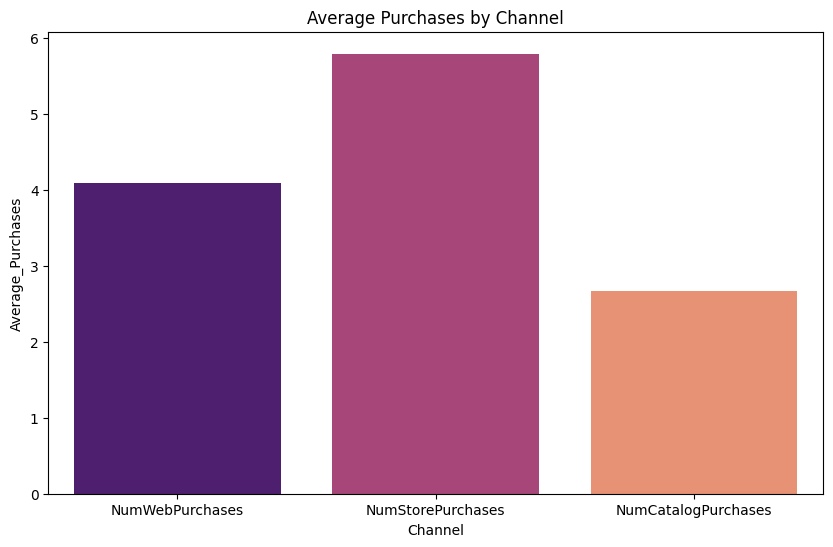

In [95]:
channel_cols = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
channel_data = data[channel_cols].mean().reset_index()
channel_data.columns = ['Channel', 'Average_Purchases']

plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Average_Purchases', data=channel_data, palette='magma')
plt.title('Average Purchases by Channel')
plt.show()

# Most Purchases here as seen are from the Store Channel
# and the least by Catalog Channel

### *4. Family Structure Analysis*

<ipython-input-97-cc9c9ec8a0b8>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




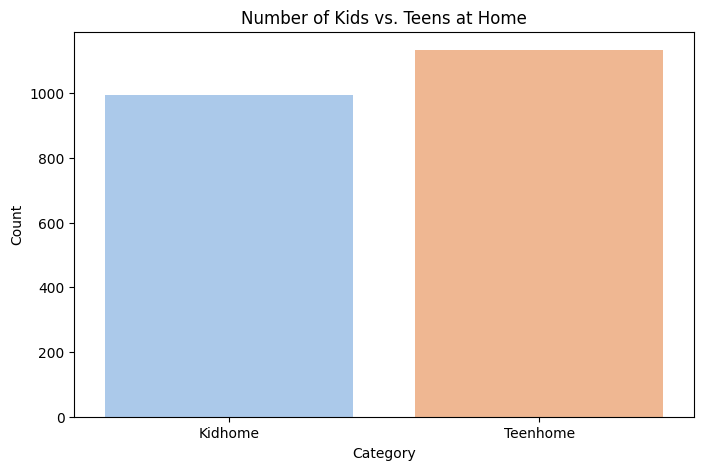

In [97]:
family_data = data[['Kidhome', 'Teenhome']].sum().reset_index()
family_data.columns = ['Category', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=family_data, palette='pastel')
plt.title('Number of Kids vs. Teens at Home')
plt.show()

# More teens at home than Kids.

### Correlation Analysis

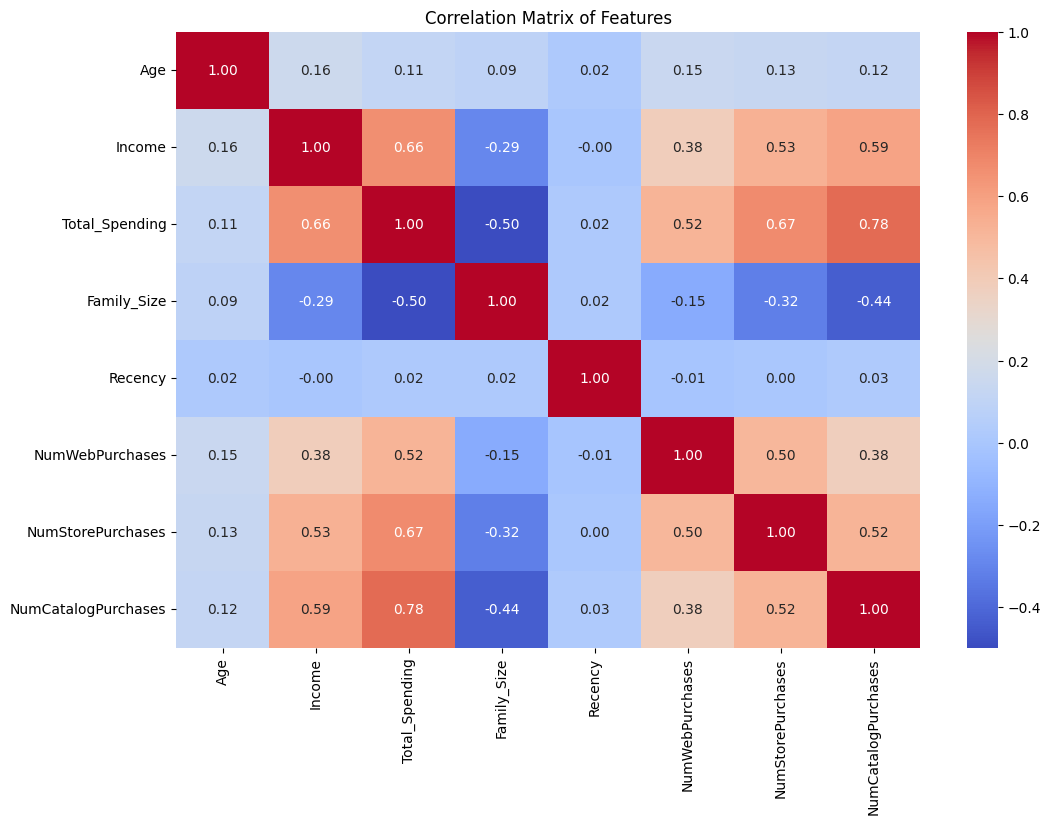

In [99]:
# Let's see how features correlate
corr_matrix = cluster_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Income and Total_Spending are positively correlated (expected).
# Family_Size negatively affects spending (larger families spend less).
# NumStorePurchases and NumWebPurchases are somewhat correlated.

# Determining Optimal Number of Clusters

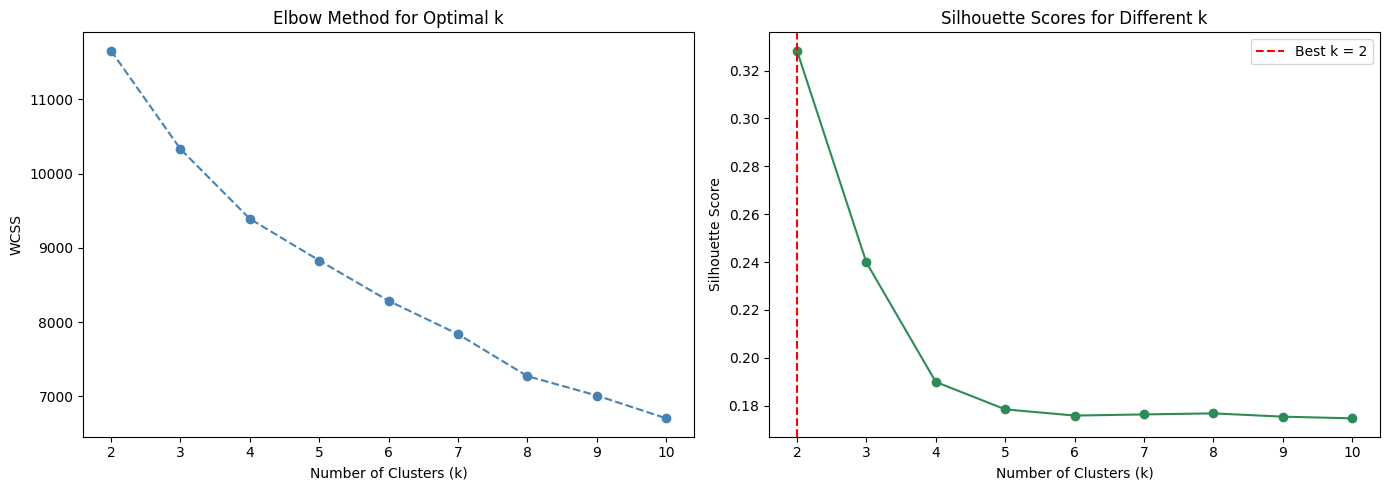

In [101]:
# Define range
min_k = 2
max_k = 11
cluster_range = range(min_k, max_k)

wcss = []
silhouette_scores = []

# Fit KMeans for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    wcss.append(kmeans.inertia_)

    # Compute silhouette only if k > 1
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Find best k based on silhouette score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# 📊 Create combined subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(cluster_range, wcss, marker='o', linestyle='--', color='steelblue')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS')

# Silhouette score plot
axes[1].plot(cluster_range, silhouette_scores, marker='o', color='seagreen')
axes[1].axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
axes[1].set_title('Silhouette Scores for Different k')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Based on the Elbow curve and Silhouette score plot, I choose 4 clusters as the
# optimal number.

## K-Means Clustering

In [146]:
# Let's assume optimal k=4 based on our analysis
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Add cluster labels to original dataframe
data['Cluster'] = kmeans.labels_
cluster_df['Cluster'] = kmeans.labels_

## Cluster Analysis and Interpretation

In [147]:
import plotly.express as px

# Select features
radar_features = ['Age', 'Income', 'Total_Spending', 'Recency', 'Family_Size',
                  'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']


# Calculate feature importance (e.g., using ANOVA)
from sklearn.feature_selection import f_classif

X = data[radar_features]
y = data['Cluster']

f_values, p_values = f_classif(X, y)
feature_importance = pd.DataFrame({'Feature': radar_features, 'F-value': f_values})

# Create interactive bar chart
fig = px.bar(feature_importance, x='Feature', y='F-value', color='Feature',
             title='Feature Importance for Clustering', template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_tickangle=-45, font=dict(size=12))
fig.show()

In [148]:
# Cluster Distribution

fig = px.histogram(data, x='Cluster', title='Distribution of Customers Across Clusters',
                   color='Cluster', color_discrete_sequence=px.colors.qualitative.Pastel,
                   template='plotly_white')

fig.update_layout(xaxis_title='Cluster', yaxis_title='Number of Customers', font=dict(size=12), bargap=0.2)
fig.show()

In [149]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create dataframe for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Instead of concatenating, add individual columns for hover data
for feature in cluster_features:
    pca_df[feature] = cluster_df[feature]

# Plot clusters with hover data
fig = px.scatter(pca_df,
                 x='PC1',
                 y='PC2',
                 color='Cluster',
                 title='Customer Segments in 2D PCA Space',
                 template='plotly_white',  # Use a clean template
                 hover_data=cluster_features,  # Include original features in hover data
                 color_discrete_sequence=px.colors.qualitative.Pastel  # Use a pastel color palette
                 )

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    font=dict(size=12),
    legend_title='Cluster'
)

fig.show()

In [150]:
# Cluster Interpretation
# Let's analyze the characteristics of each cluster.

for i in range(4):
    cluster_data = data[data['Cluster'] == i]
    print(f'Cluster {i+1}:')
    print(f'Age: {cluster_data["Age"].mean():.2f} ({cluster_data["Age"].std():.2f})')
    print(f'Income: ${cluster_data["Income"].mean():.2f} ({cluster_data["Income"].std():.2f})')  # Use 'Income'
    print(f'Total Spending: {cluster_data["Total_Spending"].mean():.2f} ({cluster_data["Total_Spending"].std():.2f})') # Use 'Total_Spending'
    print()

Cluster 1:
Age: 48.32 (8.84)
Income: $31155.61 (12473.91)
Total Spending: 104.84 (117.31)

Cluster 2:
Age: 60.47 (10.08)
Income: $59929.38 (11211.25)
Total Spending: 793.12 (332.48)

Cluster 3:
Age: 56.03 (13.76)
Income: $77994.15 (28610.58)
Total Spending: 1433.76 (408.58)

Cluster 4:
Age: 61.71 (9.99)
Income: $42686.12 (14657.76)
Total Spending: 130.29 (140.01)



In [127]:
# CONCLUSION
# The clusters have different characteristics.
# This analysis can be used to develop targeted marketing strategies
# It can as well be used to improve customer engagement.